In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
X = np.random.uniform(-4, 4, size = (100,2));

n1,n2 = 100,100
n = n1+n2

X1 = np.random.normal([-3,3], 2, (n1, 2))
X2 = np.random.normal([3,-3], 2, (n2, 2))


X = np.concatenate((X1,X2))
np.random.shuffle(X)

Y = np.ones(200)
for i in range(len(X)):
    if X[i][0] < 0:
        Y[i] = -1
    else:
        Y[i] = 1

noiseLevel = 0.4
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 

In [3]:
df_dict = {"X1":X[:,0], "X2":X[:,1],"Y":Y}

df = pd.DataFrame(df_dict)
df.head()

,X1,X2,Y
0,1.039388,0.681537,1.0
1,-2.754518,5.148180,-1.0
2,4.592597,-0.342539,1.0
3,-1.010790,5.661589,-1.0
4,-1.874348,5.669783,-1.0


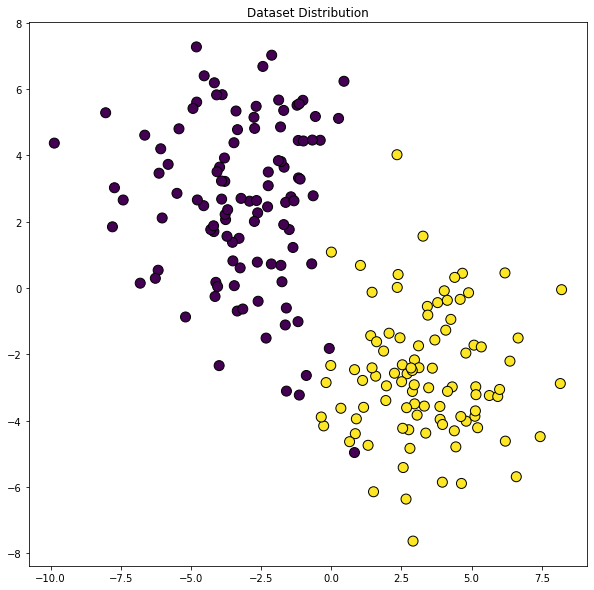

In [4]:
plt.figure(1, figsize=(10,10)) 
plt.title('Dataset Distribution')
plt.scatter(df_dict["X1"],df_dict["X2"], s=100, c=df_dict["Y"], edgecolors='k')
plt.show()

# Support Vector Classifier


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  1]
 [ 0 21]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


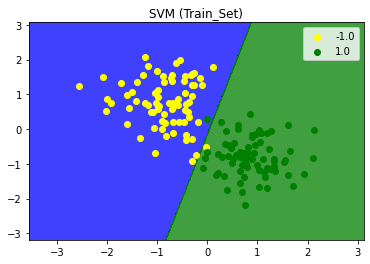

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Train_Set)')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


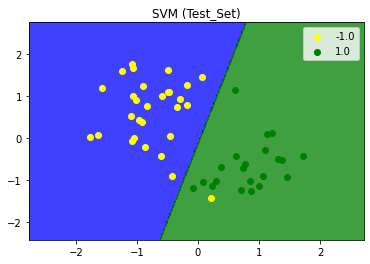

In [11]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Test_Set)')
plt.legend()
plt.show()

# OVA (One vs Rest) and OVO (One vs One)

In [12]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = SVC(decision_function_shape='ovo')
clf.fit(X, Y);

In [13]:
dec = clf.decision_function([[1]])
dec.shape[1]

6

OVO works by creating combinations of classes and training on them. As we can see there are n*(n-1)/2 classifiers. Each classifier trains data from two classes. (n is the number of classes)

In [14]:
import itertools

def ovo_classifiers(classes):
    n_class = len(classes)
    n = n_class * (n_class - 1) / 2
    combinations = itertools.combinations(classes, 2)
    return (int(n), list(combinations))

ovo_classifiers(X)

(6, [([0], [1]), ([0], [2]), ([0], [3]), ([1], [2]), ([1], [3]), ([2], [3])])

We can see that there are 6 combinations with 2 classes in them.

In [15]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] 

4

OVR on the other hand works by grouping each class with rest of the other classes. So the number of classifiers will be equal to the number of classes, 4 in our case

In [16]:
def ovr_classifiers(classes):
    n_class = len(classes)
    combinations = []
    for i in classes:
        combinations.append((i,[x for x in classes if x != i]))
    return (len(combinations), combinations)

ovr_classifiers(X)

(4,
 [([0], [[1], [2], [3]]),
  ([1], [[0], [2], [3]]),
  ([2], [[0], [1], [3]]),
  ([3], [[0], [1], [2]])])

In sklearn library, the default decision function shape is "ovo". If we change the default_decision_function to "ovr" in the SVC parameters, it wont change the classifier into one vs rest classifer, it will only change the shape of the resulting decision function.

If we want to use OVR classifier, we need to use OneVsRestClassifier 

In [17]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(SVC(kernel="linear"))
clf.fit(X, Y);

One vs Rest predicting

In [18]:
clf.predict([[0.1],[2.5],[1.1],[5],[1.7]])

array([0, 3, 0, 3, 3])

In [19]:
clf = SVC(decision_function_shape='ovo')
clf.fit(X, Y);

One vs One predicting

In [20]:
clf.predict([[0.1],[2.5],[1.1],[5],[1.7]])

array([0, 3, 1, 3, 2])